In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'dataset/fitness_dataset.csv'

In [3]:
df = pd.read_csv(path)

### Dataset Exploration

In [4]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [6]:
df.shape

(2000, 11)

In [7]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [8]:
df.dtypes

age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                object
gender                object
is_fit                 int64
dtype: object

In [9]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


In [10]:
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [11]:
df['smokes'].value_counts()

smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64

In [12]:
df['smokes'] = df['smokes'].map( 
    {
     'yes': 1,
     'no': 0,
     '1': 1,
     '0': 0
    }
)

In [13]:
df['smokes'].value_counts()

smokes
0    1099
1     901
Name: count, dtype: int64

In [14]:
df['gender'].value_counts()

gender
F    1030
M     970
Name: count, dtype: int64

In [17]:
df = df.rename(columns={'gender': 'is_male'})

In [18]:
df['is_male'].value_counts()

is_male
0    1030
1     970
Name: count, dtype: int64

In [27]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,is_male,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,0,0,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,0,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,0,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,1,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1,0,1


In [28]:
list(df.columns)

['age',
 'height_cm',
 'weight_kg',
 'heart_rate',
 'blood_pressure',
 'sleep_hours',
 'nutrition_quality',
 'activity_index',
 'smokes',
 'is_male',
 'is_fit']

### Outlier Detection - UNIVARIATE

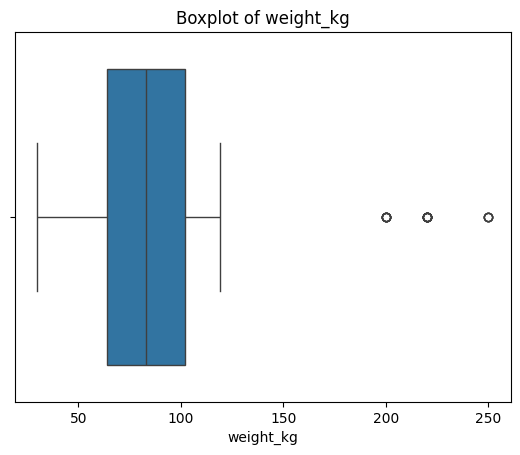

In [53]:
sns.boxplot(x=df['weight_kg'])
plt.title("Boxplot of weight_kg")
plt.show()

<Axes: xlabel='is_fit', ylabel='weight_kg'>

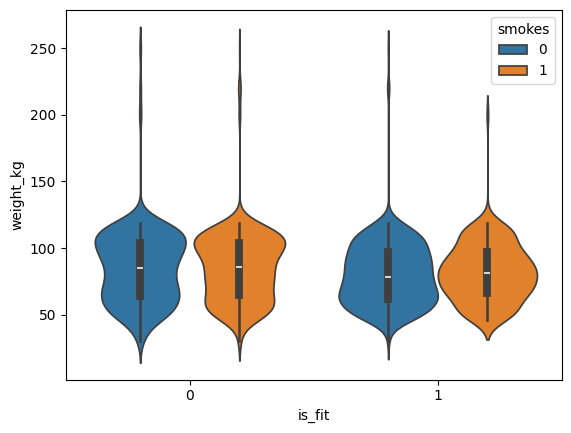

In [47]:
sns.violinplot(data=df, x='is_fit', y='weight_kg', hue='smokes')

In [29]:
box_plot_col = ['age',
 'height_cm',
 'weight_kg',
 'heart_rate',
 'blood_pressure',
 'sleep_hours',
 'nutrition_quality',
 'activity_index']